# Predicting players value based on Fifa23 statistics.
Fifa23 is a football computer game. This game contains all the best teams in the world.
Players are described by numbers from range (1-99) that tells us how much their abilities are developed.
Based on these abilities we want to predict what is their estimated market value in Euro.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


def read_dataset():
    return pd.read_csv("archive/fifa.csv")


def plot_feature_performance(X, y, y_pred, i):
    plt.scatter(X.iloc[:, i], y, color="green")
    plt.plot(X.iloc[:, i], y_pred, color="blue", linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()


def plot_bars(height, labels, num):
    arr = np.vstack([labels, height])
    ind = np.lexsort(arr)[::-1][:num]
    plt.bar(np.arange(num), arr[1, ind])
    plt.xticks(np.arange(num), arr[0, ind], rotation=-60, fontsize=10)
    plt.show()

In [4]:
from sklearn.model_selection import train_test_split


df = read_dataset()
y = df["Value(in Euro)"]
df = df[['Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeper Diving', 'Goalkeeper Handling', ' GoalkeeperKicking',
       'Goalkeeper Positioning', 'Goalkeeper Reflexes']]

scale_mapper = {"Low":1, "Medium":2, "High":3}
df["Attacking Work Rate"].replace(scale_mapper, inplace=True)
df["Defensive Work Rate"].replace(scale_mapper, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df, y)

## Linear Regression
First model that I use to predict market value is Linear Regression.
Linear Regression is an attempt to model the relationship between variables by fitting a linear equation to observed data.

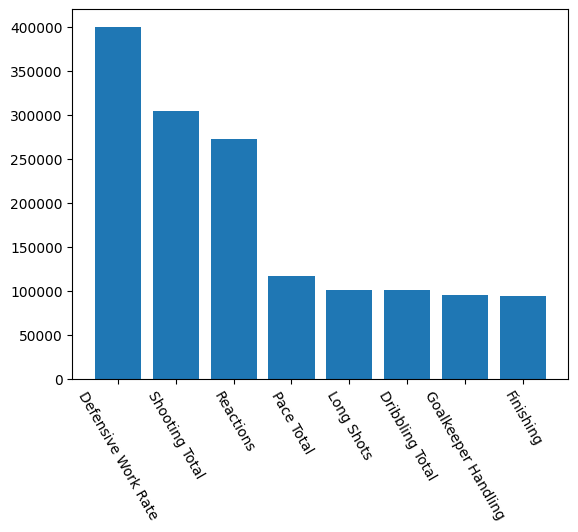

Mean squared error: 3.613e+13
Coefficient of determination: 0.29


In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

plot_bars(np.abs(regr.coef_), df.columns.to_numpy(), 8)
print("Mean squared error: {:.3e}".format(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))

## Random Forest Regression
Second model that I use is Random Forest Regression.
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

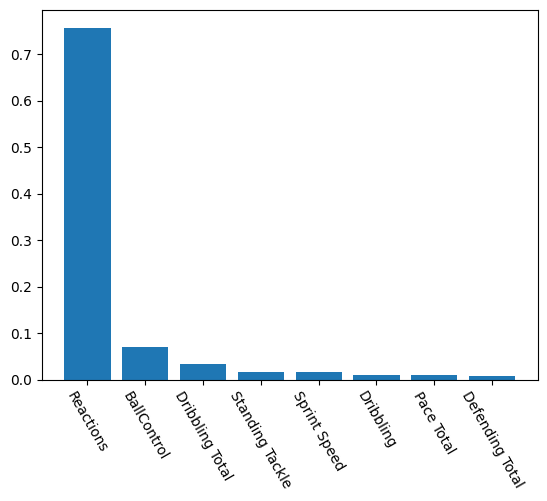

Mean squared error: 1.149e+13
Coefficient of determination: 0.78


In [6]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

plot_bars(regr.feature_importances_, df.columns.to_numpy(), 8)
print("Mean squared error: {:.3e}".format(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))

## Summary
I used linear regression and random forest regression to predict value of a player based on his features. Random forest performs much better than linear regression, it's coefficient of determination is much higher. Based on random forest's feature importance we can see that reactions of players are most important. Notice that behind reations random forest pointed some offensive features, so we can say that offensive players are moe valuable.